#### Business Problem: The bike-sharing company is facing challenges in aligning its bike availability with fluctuating rental demand. Inefficient distribution of bikes can lead to high customer wait times at popular stations or overstocking at less frequented locations. To enhance operational efficiency, the company seeks to predict bike rental demand with high accuracy. By forecasting demand, the company can optimize bike distribution, ensure timely availability at high-demand locations, and reduce operational costs associated with imbalances in bike inventory. Ultimately, improved demand predictions can lead to increased customer satisfaction and higher utilization rates. 


#### Case Study: Predicting Bike Rental Demand Objective: Develop a robust predictive model to forecast bike rental demand by leveraging historical data. The model should address missing data, employ sophisticated feature engineering techniques, and rigorously evaluate performance. The goal is to generate actionable insights for optimizing bike distribution and improving service levels across the bike-sharing network.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [100]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [101]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [102]:
print(df_train.shape)
print(df_test.shape)

(10886, 12)
(6493, 9)


## Interpretation of the variables and Data cleaning

In [103]:

# datetime: timestamp of data collected (year,month,day,hour)
# season: season in which data collected
# holiday: holiday or working day
# workingday: workingday or holiday
# weather: weather condition
# temp: actual temp (deg celsius)
# atemp: temp adjusted for humidity and wind
# humidity: humidity level in percent
# windspeed: wind speed in m/s
# casual: unregistered bike users
# registered: registered bike users
# count: total no.of bikes rented (casual+registered)

In [104]:
df=df_train.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [105]:
df['season'].value_counts()                     # likely 1:winter,2:spring,3:summer,4:Fall

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [106]:
df['weather'].value_counts()                 # likely 1:clear sky,2:cloudy,3:light rain,4:heavy rain

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [107]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [108]:
df['workingday'].value_counts()         # hear holiday and workingday are not compliment to each other so we treat them as separate variables as they indicate diff aspects of day's status

1    7412
0    3474
Name: workingday, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Changing the data types of features to optimize memory usage and ensure proper handling of features

In [110]:
# converting datetime from obj to datetime
df['datetime']=pd.to_datetime(df['datetime'])
dft['datetime']=pd.to_datetime(dft['datetime'])

# Converting categorical columns from int to category type
df['season']=df['season'].astype('category')
dft['season']=dft['season'].astype('category')
df['holiday']=df['holiday'].astype('category')
dft['holiday']=dft['holiday'].astype('category')
df['workingday']=df['workingday'].astype('category')
dft['workingday']=dft['workingday'].astype('category')
df['weather']=df['weather'].astype('category')
dft['weather']=dft['weather'].astype('category')

# converting int64 and float64 to int32 and float32 to reduce the memory usage
df['temp']=df['temp'].astype('float32')
dft['temp']=dft['temp'].astype('float32')
df['atemp']=df['atemp'].astype('float32')
dft['atemp']=dft['atemp'].astype('float32')
df['windspeed']=df['windspeed'].astype('float32')
dft['windspeed']=dft['windspeed'].astype('float32')
df['humidity']=df['humidity'].astype('int32')
dft['humidity']=dft['humidity'].astype('int32')
df['casual']=df['casual'].astype('int32')
df['registered']=df['registered'].astype('int32')
df['count']=df['count'].astype('int32')



In [111]:
df.info()                    # no missing values in both train and test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int32         
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int32         
 10  registered  10886 non-null  int32         
 11  count       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float32(3), int32(4)
memory usage: 426.0 KB


### Extracting year,month,day,hour from datetime variable

In [112]:
############## for train data ###################
y=df['datetime'].dt.year                          
m=df['datetime'].dt.month
d=df['datetime'].dt.day
h=df['datetime'].dt.hour


In [113]:
df.insert(0,'year',y)

In [114]:
df.insert(1,'month',m)
df.insert(2,'day',d)
df.insert(3,'hour',h)

In [115]:
df=df.drop(columns=['datetime'])                      # dropping datetime from train data

In [116]:
df.head(2)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [117]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [118]:
df['year'].unique()

array([2011, 2012], dtype=int64)

In [119]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [120]:
df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [121]:
############## for test data ###################
y1=dft['datetime'].dt.year                          
m1=dft['datetime'].dt.month
d1=dft['datetime'].dt.day
h1=dft['datetime'].dt.hour

In [122]:
dft.insert(0,'year',y1)
dft.insert(1,'month',m1)
dft.insert(2,'day',d1)
dft.insert(3,'hour',h1)

In [123]:
dft=dft.drop(columns=['datetime'])               # Dropping datetime from test data

In [124]:
dft.head(2)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,20,0,1,0,1,1,10.66,11.365,56,26.002701
1,2011,1,20,1,1,0,1,1,10.66,13.635,56,0.000000


In [125]:
df.head(2)

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [126]:
df['year']=df['year'].astype('category')
dft['year']=dft['year'].astype('category')
df['month']=df['month'].astype('category')
dft['month']=dft['month'].astype('category')
df['day']=df['day'].astype('category')
dft['day']=dft['day'].astype('category')
df['hour']=df['hour'].astype('category')
dft['hour']=dft['hour'].astype('category')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        10886 non-null  category
 1   month       10886 non-null  category
 2   day         10886 non-null  category
 3   hour        10886 non-null  category
 4   season      10886 non-null  category
 5   holiday     10886 non-null  category
 6   workingday  10886 non-null  category
 7   weather     10886 non-null  category
 8   temp        10886 non-null  float32 
 9   atemp       10886 non-null  float32 
 10  humidity    10886 non-null  int32   
 11  windspeed   10886 non-null  float32 
 12  casual      10886 non-null  int32   
 13  registered  10886 non-null  int32   
 14  count       10886 non-null  int32   
dtypes: category(8), float32(3), int32(4)
memory usage: 385.4 KB


In [128]:
df.duplicated().sum()                                     # No duplicates in data

0

## Exploratory Data Analysis

### Univariate Analysis

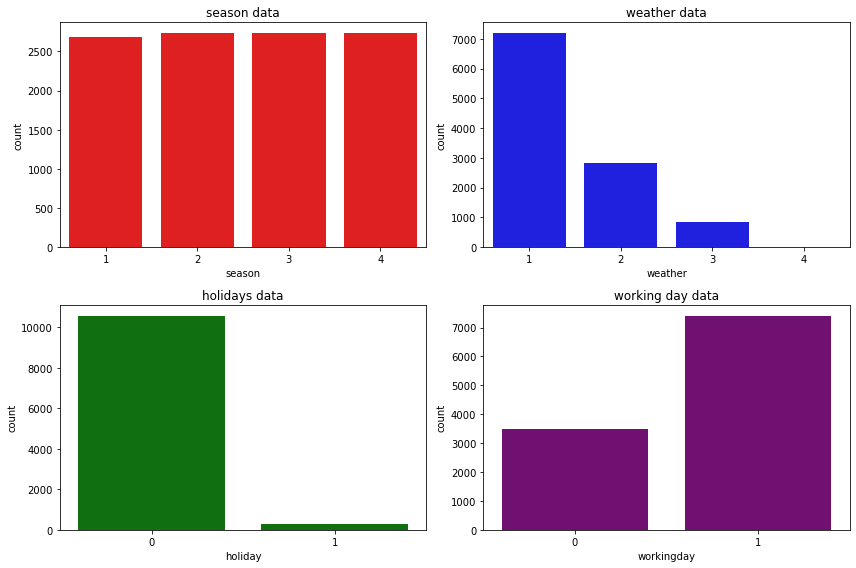

In [33]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.countplot(df['season'],data=df,ax=ax[0,0],color='red')             #using seaborn
ax[0,0].set_title('season data')
sns.countplot(df['weather'],data=df,ax=ax[0,1],color='blue')
ax[0,1].set_title('weather data')
sns.countplot(df['holiday'],data=df,ax=ax[1,0],color='green')
ax[1,0].set_title('holidays data')
sns.countplot(df['workingday'],data=df,ax=ax[1,1],color='purple')
ax[1,1].set_title('working day data')

plt.tight_layout()
plt.show()

### Bivariate Analysis

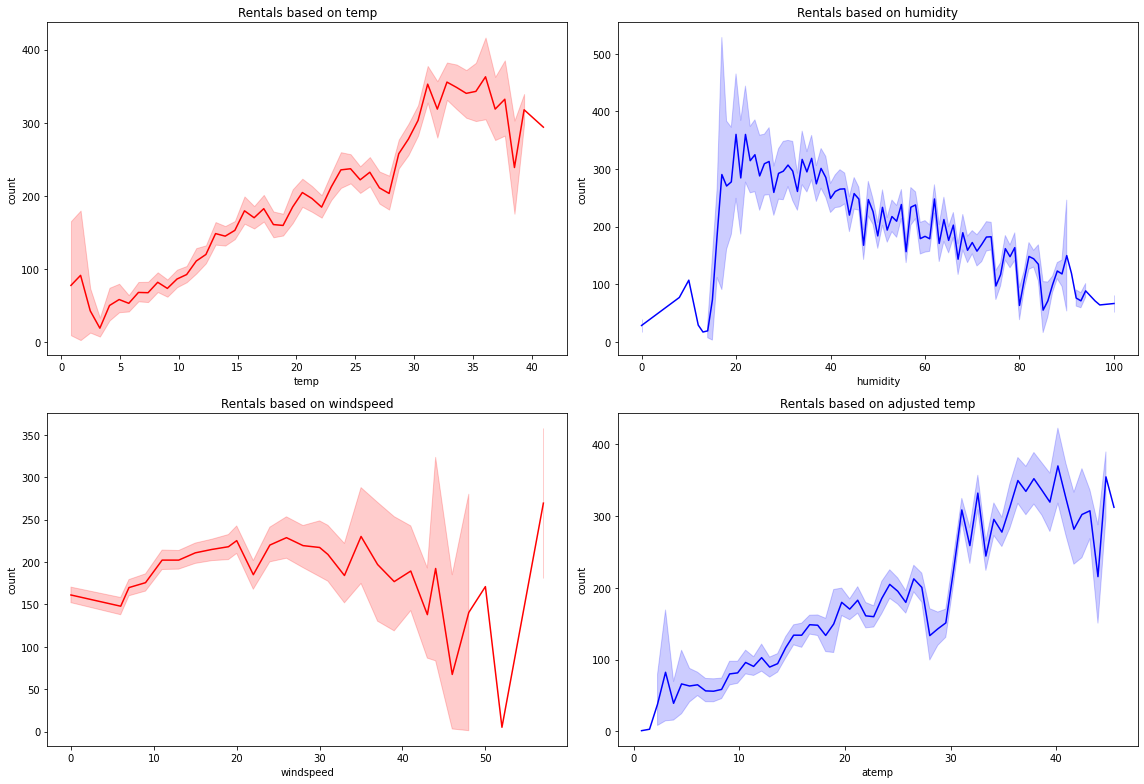

In [34]:
# numerical features

fig,ax=plt.subplots(2,2,figsize=(16,11))
sns.lineplot(df['temp'],df['count'],data=df,ax=ax[0,0],color='red')             #using seaborn
ax[0,0].set_title('Rentals based on temp')
sns.lineplot(df['humidity'],df['count'],data=df,ax=ax[0,1],color='blue')
ax[0,1].set_title('Rentals based on humidity')
sns.lineplot(df['windspeed'],df['count'],data=df,ax=ax[1,0],color='red')
ax[1,0].set_title('Rentals based on windspeed')
sns.lineplot(df['atemp'],df['count'],data=df,ax=ax[1,1],color='blue')
ax[1,1].set_title('Rentals based on adjusted temp')
plt.tight_layout()
plt.show()

The demand for bike rental is increasing as temp increasing and reaching peak around 25-30 deg celcius. Humidity and windspeed is showing negative impact on rentals.and adjusted temp is showing same impact as temp.

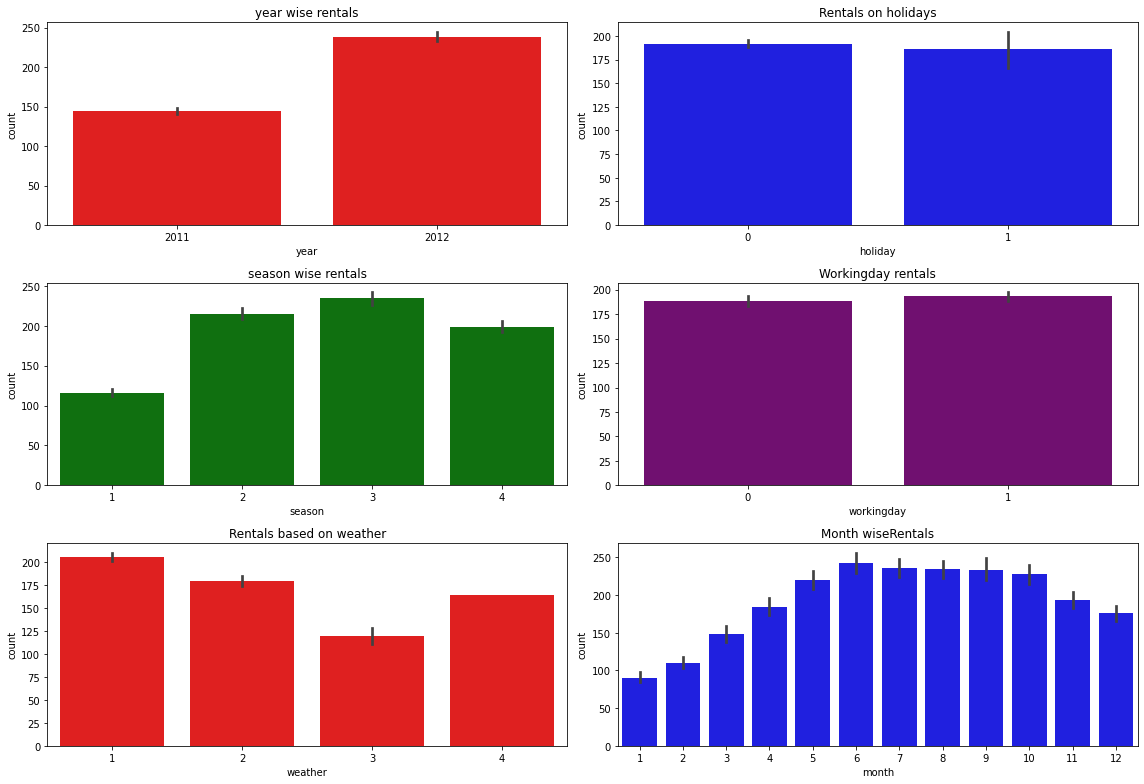

In [35]:
# Categorical columns

categorical_features=['year','month','day','hour','season','holiday','workingday','weather']

fig,ax=plt.subplots(3,2,figsize=(16,11))
sns.barplot(df['year'],df['count'],data=df,ax=ax[0,0],color='red')                                  
ax[0,0].set_title('year wise rentals')
sns.barplot(df['holiday'],df['count'],data=df,ax=ax[0,1],color='blue')
ax[0,1].set_title('Rentals on holidays')
sns.barplot(df['season'],df['count'],data=df,ax=ax[1,0],color='green')
ax[1,0].set_title('season wise rentals')
sns.barplot(df['workingday'],df['count'],data=df,ax=ax[1,1],color='purple')
ax[1,1].set_title('Workingday rentals')
sns.barplot(df['weather'],df['count'],data=df,ax=ax[2,0],color='red')
ax[2,0].set_title('Rentals based on weather')
sns.barplot(df['month'],df['count'],data=df,ax=ax[2,1],color='blue')
ax[2,1].set_title('Month wiseRentals')
plt.tight_layout()
plt.show()
       



Rentals are increased from 2011 to 2012 which shows growing popularity of rentals over time.Irrespective of holiday or workingday the demand for rentals is same. The rentals is low on 1st season compared to other seasons. The most favourable weather conditions for rental is 1 and 2. The rentals are lowest in the early and late months of the year which means bikers are preferring warmer months for rental than colder months.

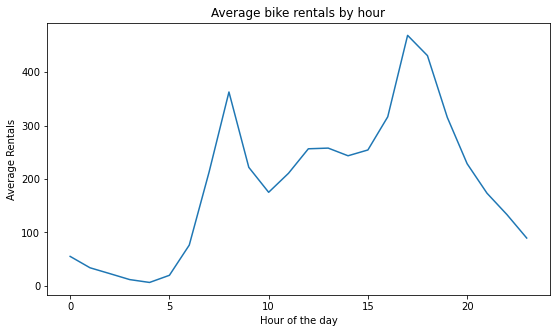

In [36]:
hourly_rentals=df.groupby('hour')['count'].mean()
plt.figure(figsize=(9,5))
sns.lineplot(x=hourly_rentals.index,y=hourly_rentals.values)
plt.title('Average bike rentals by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Average Rentals')
plt.show()

The demand for bike rental is increasing from morning 6AM and peak at around 8-9AM, after that there is a drop in demand till around 3PM and again increasing in the evening and showing peak at around 5-6PM and after that rentals are steadily decreasing.
so the rush hours for rentals will be morning around 8-9AM and evening around 5-6PM.

### Multivariate Analysis

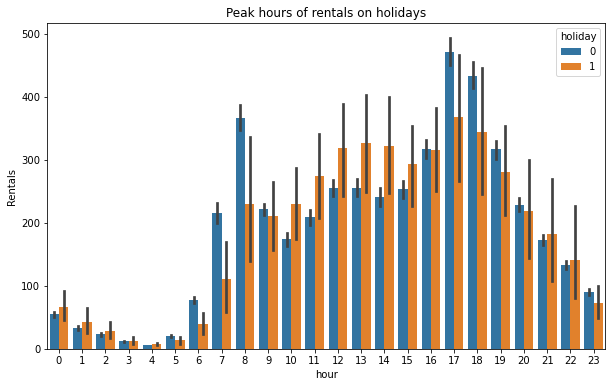

In [37]:

plt.figure(figsize=(10,6))
sns.barplot(x=df['hour'],y=df['count'],hue=df['holiday'])
plt.title('Peak hours of rentals on holidays')
plt.xlabel('hour')
plt.ylabel('Rentals')
plt.show()

on holidays the demand for bike rentals is high around 10AM to 3PM.

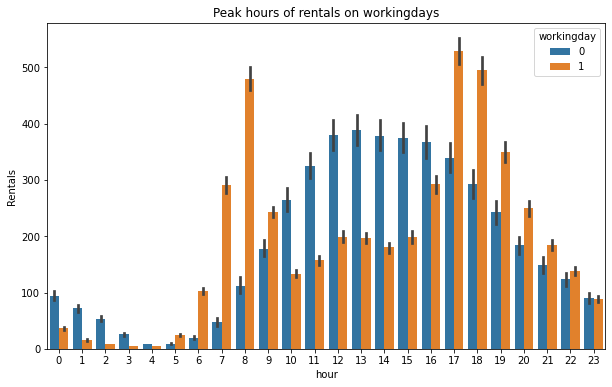

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['hour'],y=df['count'],hue=df['workingday'])
plt.title('Peak hours of rentals on workingdays')
plt.xlabel('hour')
plt.ylabel('Rentals')
plt.show()

on workingdays the demand for bike rentals is very high at morning 6-9AM and evening 5-10PM.

<AxesSubplot:>

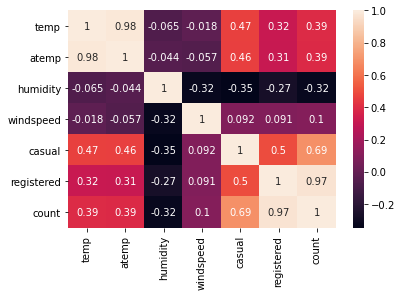

In [129]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)                 

In [130]:
df1=df.drop(columns=(['atemp','casual','registered']))

In [131]:
df1.head()

,year,month,day,hour,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011,1,1,0,1,0,0,1,9.84,81,0.0,16
1,2011,1,1,1,1,0,0,1,9.02,80,0.0,40
2,2011,1,1,2,1,0,0,1,9.02,80,0.0,32
3,2011,1,1,3,1,0,0,1,9.84,75,0.0,13
4,2011,1,1,4,1,0,0,1,9.84,75,0.0,1


## Handing the Outliers

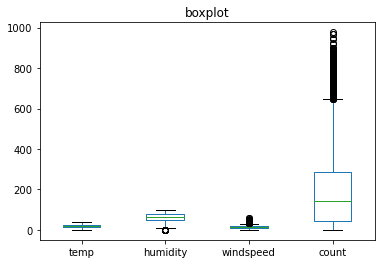

In [132]:
# outlier detection
ax = df1[df1.columns.values].plot(kind='box', title='boxplot')

# Display the plot
plt.show()                      # There are ouliers in the windspeed and total rentals variable.

In [133]:
num_var=['temp','humidity','windspeed','count']

In [134]:
# eliminating ouliers with zscores technique (above 2 standard deviations all are considered as outliers)
def outlier_treatment(column):
    q_3=df1[column].quantile(0.75)
    q_1=df1[column].quantile(0.25)
    IQR=q_3-q_1
    upper_limit=q_3+(1.5*IQR)
    lower_limit=q_1-(1.5*IQR)
    df1[column]=np.where(df1[column]>upper_limit,upper_limit,
                               np.where(df1[column]<lower_limit,lower_limit,df1[column]))


In [135]:
for i in num_var:
    outlier_treatment(i)

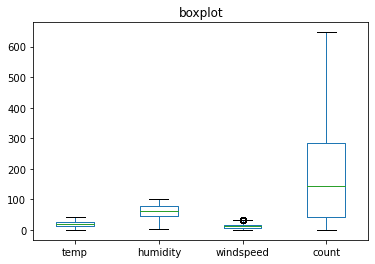

In [136]:
# outlier detection
ax = df1[num_var].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [137]:
x=df1.drop(columns=['count'])
y=df1['count']

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split( x, y, test_size=0.2, random_state=42)

In [139]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(8708, 11)
(8708,)
(2178, 11)
(2178,)


In [142]:
dft=dft.drop(columns=['atemp'])

In [143]:
x_test=dft.copy()
x_test.shape

(6493, 11)

### Performing standardization

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_val_std=scaler.transform(x_val)
x_test_std=scaler.transform(x_test)

In [146]:
x_train1=pd.DataFrame(x_train_std,columns=x_train.columns)
x_val1=pd.DataFrame(x_val_std,columns=x_val.columns)
x_test1=pd.DataFrame(x_test_std,columns=x_test.columns)

In [147]:
x_train1.head(2)

,year,month,day,hour,season,holiday,workingday,weather,temp,humidity,windspeed
0,-1.003221,0.138224,-0.724466,-0.945962,0.441439,-0.173335,0.684445,-0.657286,0.977262,1.099082,-0.846541
1,0.996790,0.429385,-1.090408,0.643217,0.441439,-0.173335,-1.461037,-0.657286,2.135457,-1.183708,0.923888


# Model Building and Evaluation

## Decision Tree Regressor

In [148]:

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

In [78]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=23, random_state=42)

#Fitting the model
dtr.fit(x_train1, y_train)

#Training score
print('Training_score: ',dtr.score(x_train1, y_train))
print('Testing_score: ',dtr.score(x_val1, y_val))

Training_score:  0.9338385621043405
Testing_score:  0.9124308936218036


In [79]:
#Prediction
dtr_predt = dtr.predict(x_test1)
dtr_predv = dtr.predict(x_val1)


## Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr = RandomForestRegressor()

In [81]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [14,15,16,18],
    'min_samples_leaf' : [2,3,4,5],
    'min_samples_split' : [5,6,7],
   
}

#Grid Search Object
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(x_train1, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [83]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth=16, min_samples_leaf=2, min_samples_split=5, random_state=42)

#Fitting the model
rfr.fit(x_train1, y_train)

print('Training_score: ',rfr.score(x_train1, y_train))
print('Testing_score: ',rfr.score(x_val1, y_val))

Training_score:  0.9810373129292712
Testing_score:  0.9451315769362543


In [84]:
#Prediction
rfr_predt = rfr.predict(x_test1)
rfr_predv = rfr.predict(x_val1)

## Comparing the two models

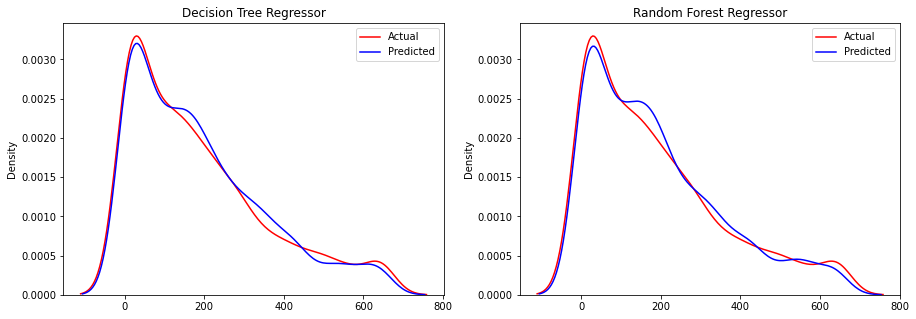

In [85]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

#decision tree regressor
sns.distplot(x = y_val, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
sns.distplot(x = dtr_predv, ax = ax[0], color = 'b', hist = False, label = 'Predicted')
ax[0].legend()

#random forest regressor
sns.distplot(x = y_val, ax = ax[1], color = 'r', hist = False, label = 'Actual').set_title('Random Forest Regressor')
sns.distplot(x = rfr_predv, ax = ax[1], color = 'b', hist = False, label = 'Predicted')
ax[1].legend()

The difference between actual and predicted values with Random forest is much lesser than with Decision Tree.

## Model Evaluation

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Decision Tree Regressor
print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_val, dtr_predv))
print('Mean Absolute Error : ', mean_absolute_error(y_val, dtr_predv))
print('R2 Score : ', r2_score(y_val, dtr_predv))

#Random Forest Regressor
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_val, rfr_predv))
print('Mean Absolute Error : ', mean_absolute_error(y_val, rfr_predv))
print('R2 Score : ', r2_score(y_val, rfr_predv))

Decision Tree Regressor
Mean Squared Error :  2612.483347210209
Mean Absolute Error :  31.79586889645967
R2 Score :  0.9124308936218036
Random Forest Regressor
Mean Squared Error :  1636.9110919397363
Mean Absolute Error :  25.86081350900563
R2 Score :  0.9451315769362543


The Random Forest Regressor is performing better than the Decision Tree Regressor based on the evaluation metrics (lower MSE, MAE, and higher R²). so Random Forest Regressor will be the preffered model for predicting bike rentals.

## Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

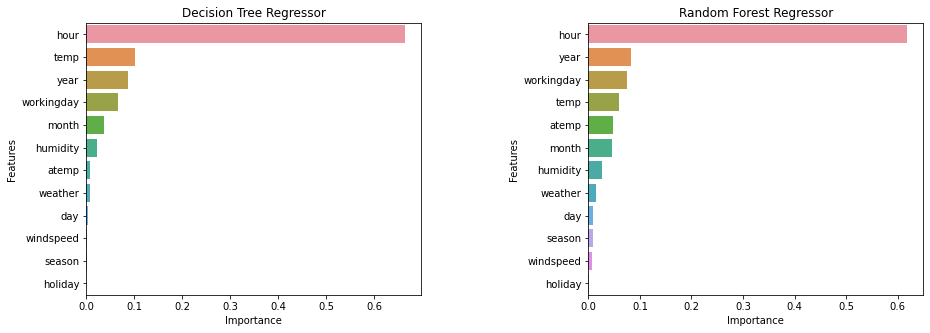

In [87]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':x_train1.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':x_train1.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

Hour of the day is playing a crucial role in building the best model.